In [245]:
import numpy as np
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

%matplotlib inline

In [246]:
def back_sub(A, b, x, n):
    """
    The part of Gaussian Elimination that does the backward substitution (can be reused in both versions without row swapping and with partial pivoting)

    Note: need to pass n from the parent function (Gaussian Elimination that determines the size of A and b)

    :param A: square matrix of size n x n (already performed forward elimination where A is an upper triangular matrix)
    :param b: column vector of size n x 1
    :param x: solution vector x to Ax = b
    :param n: size n from A and b
    :return:
    """

    x[n - 1] = b[n - 1] / A[n - 1][n - 1]

    for i in reversed(range(0, n - 1)):
        temp = b[i]

        for j in range(i + 1, n):
            temp = temp - (A[i][j] * x[j])

        x[i] = temp / A[i][i]


In [247]:
def forward_elim_no_row_swap(A, b, n):
    """
    The part of Gaussian Elimination that does the forward elimination (only for version without row swapping)

    Note: need to pass n from the parent function (Gaussian Elimination that determines the size of A and b)

    :param A: square matrix of size n x n
    :param b: column vector of size n x 1
    :param n: size n from A and b
    :return:
    """

    for k in range(n - 1):
        for i in range(k + 1, n):
            # find multiplier to zero out A[i][k] in the ith row
            x_mult = A[i][k] / A[k][k]

            # typo in pseudocode, should be set to 0 instead of x_mult
            A[i][k] = 0

            # update ith row of A
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - (x_mult * A[k][j])

            # update ith element of b
            b[i] = b[i] - (x_mult * b[k])


In [248]:
def gauss_elim_no_row_swap(A, b):
    """
    Gaussian elimination without row swapping on system Ax = b, solving for x

    Note: the psuedocode given was adapted and indices in the pseudocode had to be subtracted by 1 (since indexing in Python starts at 0 instead of 1)

    :param A: square matrix of size n x n
    :param b: column vector of size n x 1
    :return: solution vector x to Ax = b
    """

    (n, _) = A.shape
    b_len = len(b)
    assert(n == b_len)

    x = np.zeros((n, ))

    # Forward Elimination (to get an upper triangular system)
    forward_elim_no_row_swap(A, b, n)

    #FIXME
    print("intermediate before")
    print(f"A: {A}")
    print(f"b: {b}")
    print("intermediate after")

    # Backward substitution (solving upper triangular system from above)
    back_sub(A, b, x, n)

    return x


In [249]:
# IMPORTANT - need to create A and b with the float type since the default type is int (if no '.' is used after the inputted numbers in the array)

A = np.array(np.mat('-3, 2, -1;'
                    '6, -6, 7;'
                    '3, -4, 4'), dtype=float)
b = np.array([-1, -7, -6], dtype=float)

print(A.shape)
print(b.shape)
print(f"A: {A}")
print(f"b: {b}")

(n, _) = A.shape

# copy A and b just in case we need to reference the original data
x = gauss_elim_no_row_swap(A, b)
print(f"x: {x}")

x_actual = b = np.array([2, 2, -1])
print(f"actual x: {x_actual}")

diff = np.linalg.norm(x - x_actual)
assert(diff < n * 1e-12)


(3, 3)
(3,)
A: [[-3.  2. -1.]
 [ 6. -6.  7.]
 [ 3. -4.  4.]]
b: [-1. -7. -6.]
intermediate before
A: [[-3.  2. -1.]
 [ 0. -2.  5.]
 [ 0.  0. -2.]]
b: [-1. -9.  2.]
intermediate after
x: [ 2.  2. -1.]
actual x: [ 2  2 -1]


In [250]:
def forward_elim_partial_pivot(A, b, n):
    """
    The part of Gaussian Elimination that does the forward elimination (only for version with partial pivoting)

    Note: to make the coding easier, this does NOT use pointers to reduce time for physically swapping rows in memory

    :param A: square matrix of size n x n
    :param b: column vector of size n x 1
    :param n: size n from A and b
    :return:
    """

    for k in range(n - 1):
        # fine to initialize as 0 since we only deal with non-negative numbers for finding the max of absolute magnitudes
        p_max = 0

        # pseudocode missing initialization of j (when no row swapping is needed)
        j = k

        # search for max magnitude in kth column below kth row (keep track of row index)
        for i in range(k, n):
            p = np.abs(A[i][k])

            if p > p_max:
                p_max = p
                j = i

        # if highest magnitude is in some other row than the current row, requiring row swapping
        if j != k:
            # swap the jth and kth rows in A
            tempRow = np.copy(A[j])  # important since only the pointer is copied otherwise
            A[j] = A[k]
            A[k] = tempRow

            # swap the jth and kth elements in b
            temp = b[j]
            b[j] = b[k]
            b[k] = temp

        for i in range(k + 1, n):
            # find multiplier to zero out A[i][k] in the ith row
            x_mult = A[i][k] / A[k][k]
            A[i][k] = 0

            # update ith row of A
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - (x_mult * A[k][j])

            # update ith element of b
            b[i] = b[i] - (x_mult * b[k])


In [251]:
def gauss_elim_partial_pivot(A, b):
    """
    Gaussian elimination with partial pivoting on system Ax = b, solving for x

    Note: need to pass n from the parent function (Gaussian Elimination that determines the size of A and b)
    Another note: the psuedocode given was adapted and indices in the pseudocode had to be subtracted by 1 (since indexing in Python starts at 0 instead of 1)

    :param A: square matrix of size n x n
    :param b: column vector of size n x 1
    :return: solution vector x to Ax = b
    """

    (n, _) = A.shape
    b_len = len(b)
    assert(n == b_len)

    x = np.zeros((n, ))

    # Forward Elimination (to get an upper triangular system)
    forward_elim_partial_pivot(A, b, n)

    #FIXME
    if PRINT_DEBUG:
        print("intermediate before")
        print(f"A: {A}")
        print(f"b: {b}")
        print("intermediate after")

    # Backward substitution (solving upper triangular system from above)
    back_sub(A, b, x, n)

    return x


In [252]:
# IMPORTANT - need to create A and b with the float type since the default type is int (if no '.' is used after the inputted numbers in the array)

# to print the intermediate values of A and b
PRINT_DEBUG = True

A = np.array(np.mat('2, 4, -2, -2;'
                    '1, 2, 4, -3;'
                    '-3, -3, 8, -2;'
                    '-1, 1, 6, -3'), dtype=float)
b = np.array([-4, 5, 7, 7], dtype=float)

print(A.shape)
print(b.shape)
print(f"A: {A}")
print(f"b: {b}")

(n, _) = A.shape

# copy A and b just in case we need to reference the original data
x = gauss_elim_partial_pivot(np.copy(A), np.copy(b))
print(f"x: {x}")

x_actual = b = np.array([1, 2, 3, 4])
print(f"actual x: {x_actual}")

diff = np.linalg.norm(x - x_actual)
assert(diff < n * 1e-12)


(4, 4)
(4,)
A: [[ 2.  4. -2. -2.]
 [ 1.  2.  4. -3.]
 [-3. -3.  8. -2.]
 [-1.  1.  6. -3.]]
b: [-4.  5.  7.  7.]
intermediate before
A: [[-3.         -3.          8.         -2.        ]
 [ 0.          2.          3.33333333 -3.33333333]
 [ 0.          0.          5.         -2.        ]
 [ 0.          0.          0.          1.        ]]
b: [7.         0.66666667 7.         4.        ]
intermediate after
x: [1. 2. 3. 4.]
actual x: [1 2 3 4]


In [253]:
# to print the intermediate values of A and b
PRINT_DEBUG = False

# N_arr = 10 * np.array([2 ** x for x in range(0, 4)])
N_arr = np.array([10, 20, 40, 80])
print(N_arr)

norm_list = []
built_in_time_list = []
my_time_list = []

for N in N_arr:
    # keep generating random A matrices until it is NOT singular (when determinant is nonzero)
    while True:
        A = np.random.rand(N, N)
        # print(f"A: {A}")
        # print(f"det(A): {np.linalg.det(A)}")

        # need to be above some small value (due to limited numerical precision)
        if np.linalg.det(A) > 1e-12:
            break

    # generate random b vectors
    b = np.random.rand(N)

    # IMPORTANT - need copy so the built-in solver does not edit A and b and pass in different values into our GE function
    # use built-in to solve Ax = b
    built_in_time_start = time.time()
    x_built_in = np.linalg.solve(np.copy(A), np.copy(b))
    built_in_time_end = time.time()

    # use our Gaussian Elimination with partial pivoting
    my_time_start = time.time()
    x_mine = gauss_elim_partial_pivot(np.copy(A), np.copy(b))
    my_time_end = time.time()

    # FIXME:
    print(f"x built in: {x_built_in}")
    print(f"x mine: {x_mine}")

    # verification
    norm = np.linalg.norm(x_mine - x_built_in)
    # TODO: the norm of the error may be greater than 1e-12...
    assert(norm < 1e-10 * N)

    norm_list.append(norm)
    built_in_time_list.append(built_in_time_end - built_in_time_start)
    my_time_list.append(my_time_end - my_time_start)


[10 20 40 80]
x built in: [ 0.90255566 -0.06915512 -0.40720461 -0.0130279   0.92987474 -0.93001893
 -0.44832155 -0.12168249  0.42721531  0.42588244]
x mine: [ 0.90255566 -0.06915512 -0.40720461 -0.0130279   0.92987474 -0.93001893
 -0.44832155 -0.12168249  0.42721531  0.42588244]
x built in: [ 0.4981446   1.00964179 -1.23705606 -0.73144578 -1.52347317 -0.60113632
  0.49557213 -0.61634083  0.60792255 -0.74874643 -0.21574161  0.13235649
  0.53469571  0.88433644 -0.30656598  1.01400646  1.99930608 -0.09248237
  0.49274376  0.07476751]
x mine: [ 0.4981446   1.00964179 -1.23705606 -0.73144578 -1.52347317 -0.60113632
  0.49557213 -0.61634083  0.60792255 -0.74874643 -0.21574161  0.13235649
  0.53469571  0.88433644 -0.30656598  1.01400646  1.99930608 -0.09248237
  0.49274376  0.07476751]
x built in: [-0.25103183 -0.40104587  0.15145456 -0.02485544  0.42786309  0.38010655
 -0.92591013 -0.31096883 -0.0242108  -0.18387447 -0.18863137 -0.78660957
  0.06077974 -1.21012738 -0.60630336  0.03008944  0.

In [254]:
table = PrettyTable()
table.field_names = ["matrix/vector size (N)", "norm of error", "timing of built-in solver", "timing of GE (partial pivoting)"]
table.add_rows(
    [
        [N, norm, built_in_timing, my_timing] for (N, norm, built_in_timing, my_timing) in zip(N_arr, norm_list, built_in_time_list, my_time_list)
    ]
)

print(table)


+------------------------+-----------------------+---------------------------+---------------------------------+
| matrix/vector size (N) |     norm of error     | timing of built-in solver | timing of GE (partial pivoting) |
+------------------------+-----------------------+---------------------------+---------------------------------+
|           10           | 2.217302348033905e-15 |            0.0            |               0.0               |
|           20           | 5.107044768930868e-15 |            0.0            |               0.0               |
|           40           | 5.317810023770905e-15 |            0.0            |               0.0               |
|           80           | 4.800009874308177e-14 |    0.015620708465576172   |       0.046869754791259766      |
+------------------------+-----------------------+---------------------------+---------------------------------+


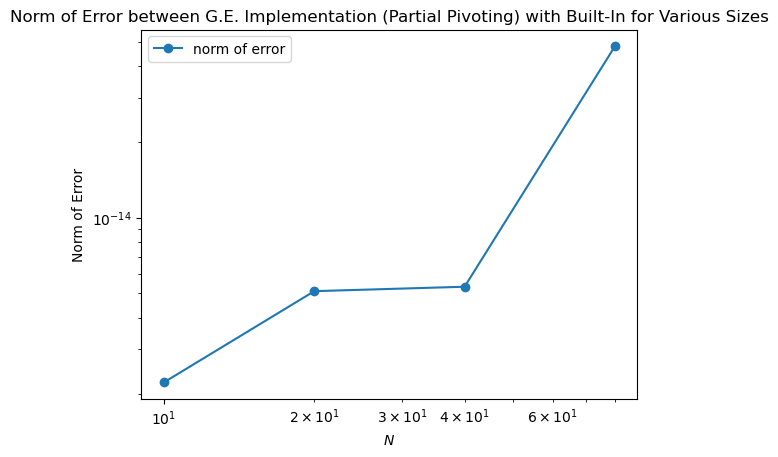

In [257]:
plt.loglog(N_arr, norm_list, 'o-', label="norm of error")
# plt.loglog(N_arr, 1e-14 * (N_arr ** 2), label="$O(N^3)$")

plt.xlabel("$N$")
plt.ylabel("Norm of Error")
plt.legend(loc="upper left")
plt.title('Norm of Error between G.E. Implementation (Partial Pivoting) with Built-In for Various Sizes')

plt.show()


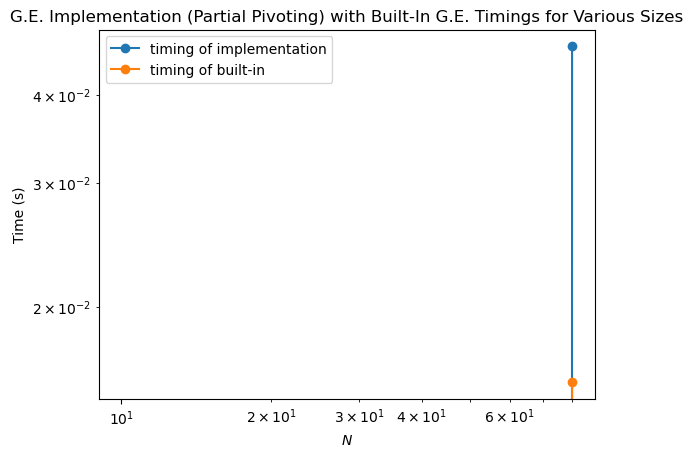

In [258]:
plt.loglog(N_arr, my_time_list, 'o-', label="timing of implementation")
plt.loglog(N_arr, built_in_time_list, 'o-', label="timing of built-in")
# plt.loglog(N_arr, 1e-1 * (N_arr ** 2), label="$O(N^3)$")

plt.xlabel("$N$")
plt.ylabel("Time (s)")
plt.legend(loc="upper left")
plt.title("G.E. Implementation (Partial Pivoting) with Built-In G.E. Timings for Various Sizes")

plt.show()
